# Importing Libraries 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [2]:
df_task_2= pd.read_excel('my_quantium_Task_1_output.xlsx', index_col=0 )
df_task_2.head(5)

,DATE,STORE_NUMBER,LOYALTY_CARD_NUMBER,TRANSACTION_ID,PRODUCT_NUMBER,PRODUCT_NAME,PRODUCT_QTY,TOTAL_SALES,PACKAGE_SIZE,ITEMS_TYPE,LIFESTAGE,MEMBER_TYPE,MONTHS-and-YEARS,Per_Chips_Price
0,2018-10-19,1,1000,1,5,Natural Chip Company,2,6.0,175g,SeaSalt,YOUNG SINGLES/COUPLES,Premium,2018-October,3.00
1,2019-05-16,1,1307,348,66,CCs,3,6.3,175g,Nacho Cheese,MIDAGE SINGLES/COUPLES,Budget,2019-May,2.10
2,2019-05-22,1,1343,383,61,Smiths,2,2.9,170g,Crinkle Cut Chips Chicken,MIDAGE SINGLES/COUPLES,Budget,2019-May,1.45
3,2018-08-19,2,2373,974,69,Smiths,5,15.0,175g,Chip Thinly S/Cream & Onion,MIDAGE SINGLES/COUPLES,Budget,2018-August,3.00
4,2018-08-20,2,2426,1038,108,Kettle,3,13.8,150g,Tortilla ChipsHny & Jlpno Chilli,MIDAGE SINGLES/COUPLES,Budget,2018-August,4.60


***Few details from the Dataset:-***

1> There are a total of 272 store in the data set.

2> Total number of Customers are 72636 as per "LOYALTY_CARD_NUMBER".

3> Total number of Transaction Id is 263125.

4> The first date is '2018-07-03' and the last date is '2019-07-02' in total 364 days.

5> There are 23 brands and 111 different flavours of chips.

6> There are 7 different types of Lifestage and 3 different Member types. 

7> The total sales of all the store is $1933115

In [3]:
## This line of code is used to see all the THINGS in the OUTPUT section 

pd.set_option('display.max_rows', None) 

# Monthly Sales Experience of each Store.

####  1> For each store and month, calculate the total sales.

In [4]:
## Calculating the Monthly Total Sales of each STOREs.

cal_total_sales= df_task_2.groupby(['MONTHS-and-YEARS', 'STORE_NUMBER', ])['TOTAL_SALES'].sum()
cal_total_sales.head(5)

MONTHS-and-YEARS  STORE_NUMBER
2018-August       1                199.60
                  2                192.70
                  3               1065.45
                  4               1256.50
                  5                757.30
Name: TOTAL_SALES, dtype: float64

In [5]:
df_of_cal_total_sales=cal_total_sales.reset_index()
df_of_cal_total_sales.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,TOTAL_SALES
0,2018-August,1,199.60
1,2018-August,2,192.70
2,2018-August,3,1065.45
3,2018-August,4,1256.50
4,2018-August,5,757.30


In [6]:
## Renaming the TOTAL Sales column to Monthly Total Sale as the column contains the MOnthly Sales  TOtal data  
df_of_cal_total_sales.rename(columns={'TOTAL_SALES':'Monthly Total Sale'}, inplace=True)
df_of_cal_total_sales.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale
0,2018-August,1,199.60
1,2018-August,2,192.70
2,2018-August,3,1065.45
3,2018-August,4,1256.50
4,2018-August,5,757.30


In [7]:
df_of_cal_total_sales.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale
count,3416,3416.000000,3416.000000
unique,13,NaN,NaN
top,2018-July,NaN,NaN
freq,266,NaN,NaN
mean,NaN,136.886710,565.900176
std,NaN,78.417151,400.752288
min,NaN,1.000000,1.800000
25%,NaN,68.000000,207.925000
50%,NaN,137.000000,481.250000
75%,NaN,204.000000,911.400000


In the ***Montly Total Sales of each store*** the **MINIMUM** sold is 1.80 dollar and the **MAXIMUM** sold is  1642 dollar

####  2> For each store and month, calculate the number of customers.

In [8]:
## Here we are grouping to calculate the how many customers each store have or visited.

cal_total_customer= df_task_2.groupby(['MONTHS-and-YEARS', 'STORE_NUMBER'])['LOYALTY_CARD_NUMBER'].nunique()
cal_total_customer.head(5)

MONTHS-and-YEARS  STORE_NUMBER
2018-August       1                46
                  2                38
                  3               111
                  4               124
                  5                99
Name: LOYALTY_CARD_NUMBER, dtype: int64

In [9]:
df_of_cal_total_customer=cal_total_customer.reset_index()
df_of_cal_total_customer.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,LOYALTY_CARD_NUMBER
0,2018-August,1,46
1,2018-August,2,38
2,2018-August,3,111
3,2018-August,4,124
4,2018-August,5,99


In [10]:
df_of_cal_total_customer.rename(columns={'LOYALTY_CARD_NUMBER': 'Monthly Total Customers'},inplace=True)
df_of_cal_total_customer.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Customers
0,2018-August,1,46
1,2018-August,2,38
2,2018-August,3,111
3,2018-August,4,124
4,2018-August,5,99


In [11]:
df_of_cal_total_customer.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Customers
count,3416,3416.000000,3416.000000
unique,13,NaN,NaN
top,2018-July,NaN,NaN
freq,266,NaN,NaN
mean,NaN,136.886710,64.895785
std,NaN,78.417151,38.972479
min,NaN,1.000000,1.000000
25%,NaN,68.000000,37.000000
50%,NaN,137.000000,54.000000
75%,NaN,204.000000,101.000000


In the ***Montly Total Customers of each store*** the **MINIMUM** customer visit is 1 and the **MAXIMUM** customer visit is 150. 

#### 3>  For each store and month, calculate transactions per customer.

In [12]:
cal_trans_customer= df_task_2.groupby(['MONTHS-and-YEARS', 'STORE_NUMBER', 'LOYALTY_CARD_NUMBER'])['TRANSACTION_ID'].count()
cal_trans_customer.head()

MONTHS-and-YEARS  STORE_NUMBER  LOYALTY_CARD_NUMBER
2018-August       1             1020                   1
                                1027                   1
                                1048                   1
                                1053                   1
                                1114                   1
Name: TRANSACTION_ID, dtype: int64

In [13]:
df_of_cal_trans_customer=cal_trans_customer.reset_index()

In [14]:
avg_cal_trans_customer=df_of_cal_trans_customer.groupby(['MONTHS-and-YEARS','STORE_NUMBER'])["TRANSACTION_ID"].mean()
avg_cal_trans_customer.head(5)

MONTHS-and-YEARS  STORE_NUMBER
2018-August       1               1.021739
                  2               1.105263
                  3               1.171171
                  4               1.209677
                  5               1.151515
Name: TRANSACTION_ID, dtype: float64

In [15]:
df_of_avg_cal_trans_customer= avg_cal_trans_customer.reset_index()
df_of_avg_cal_trans_customer.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,TRANSACTION_ID
0,2018-August,1,1.021739
1,2018-August,2,1.105263
2,2018-August,3,1.171171
3,2018-August,4,1.209677
4,2018-August,5,1.151515


In [16]:
df_of_avg_cal_trans_customer.rename(columns={'TRANSACTION_ID': 'Avg. Monthly Transaction Per Customer'}, inplace=True)
df_of_avg_cal_trans_customer.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Avg. Monthly Transaction Per Customer
0,2018-August,1,1.021739
1,2018-August,2,1.105263
2,2018-August,3,1.171171
3,2018-August,4,1.209677
4,2018-August,5,1.151515


In [17]:
df_of_avg_cal_trans_customer.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Avg. Monthly Transaction Per Customer
count,3416,3416.000000,3416.000000
unique,13,NaN,NaN
top,2018-July,NaN,NaN
freq,266,NaN,NaN
mean,NaN,136.886710,1.136267
std,NaN,78.417151,0.117173
min,NaN,1.000000,1.000000
25%,NaN,68.000000,1.026316
50%,NaN,137.000000,1.109091
75%,NaN,204.000000,1.234910


#### 4> For each store and month, calculate chips per customer

In [18]:
cal_chips_per_customer= df_task_2.groupby(['MONTHS-and-YEARS', 'STORE_NUMBER', 'LOYALTY_CARD_NUMBER'])['PRODUCT_QTY'].sum()
cal_chips_per_customer.head(5)

MONTHS-and-YEARS  STORE_NUMBER  LOYALTY_CARD_NUMBER
2018-August       1             1020                   1
                                1027                   1
                                1048                   1
                                1053                   1
                                1114                   1
Name: PRODUCT_QTY, dtype: int64

In [19]:
df_of_cal_chips_per_customer= cal_chips_per_customer.reset_index()

In [20]:
avg_cal_chips_per_customer= df_of_cal_chips_per_customer.groupby(['MONTHS-and-YEARS', 'STORE_NUMBER'])['PRODUCT_QTY'].mean()
avg_cal_chips_per_customer.head(5)

MONTHS-and-YEARS  STORE_NUMBER
2018-August       1               1.282609
                  2               1.447368
                  3               2.225225
                  4               2.322581
                  5               2.191919
Name: PRODUCT_QTY, dtype: float64

In [21]:
df_of_avg_cal_chips_per_customer= avg_cal_chips_per_customer.reset_index()
df_of_avg_cal_chips_per_customer.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,PRODUCT_QTY
0,2018-August,1,1.282609
1,2018-August,2,1.447368
2,2018-August,3,2.225225
3,2018-August,4,2.322581
4,2018-August,5,2.191919


In [22]:
df_of_avg_cal_chips_per_customer.rename(columns={'PRODUCT_QTY': 'Avg. Packet of Chips per customer'}, inplace=True)
df_of_avg_cal_chips_per_customer.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Avg. Packet of Chips per customer
0,2018-August,1,1.282609
1,2018-August,2,1.447368
2,2018-August,3,2.225225
3,2018-August,4,2.322581
4,2018-August,5,2.191919


In [23]:
df_of_avg_cal_chips_per_customer.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Avg. Packet of Chips per customer
count,3416,3416.000000,3416.000000
unique,13,NaN,NaN
top,2018-July,NaN,NaN
freq,266,NaN,NaN
mean,NaN,136.886710,2.071305
std,NaN,78.417151,0.461737
min,NaN,1.000000,1.000000
25%,NaN,68.000000,1.787338
50%,NaN,137.000000,2.146789
75%,NaN,204.000000,2.450980


#### 5> For each store and month, calculate the average price per unit.

In [24]:
cal_avg_per_unit= df_task_2.groupby(['MONTHS-and-YEARS', 'STORE_NUMBER'])['Per_Chips_Price'].mean()
cal_avg_per_unit.head(5)

MONTHS-and-YEARS  STORE_NUMBER
2018-August       1               3.437234
                  2               3.577381
                  3               4.439154
                  4               4.345333
                  5               3.551754
Name: Per_Chips_Price, dtype: float64

In [25]:
df_of_cal_avg_per_unit= cal_avg_per_unit.reset_index()
df_of_cal_avg_per_unit.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Per_Chips_Price
0,2018-August,1,3.437234
1,2018-August,2,3.577381
2,2018-August,3,4.439154
3,2018-August,4,4.345333
4,2018-August,5,3.551754


In [26]:
df_of_cal_avg_per_unit.rename(columns={'Per_Chips_Price': 'Avg. Cost per chips'},inplace=True)
df_of_cal_avg_per_unit.head(3)

,MONTHS-and-YEARS,STORE_NUMBER,Avg. Cost per chips
0,2018-August,1,3.437234
1,2018-August,2,3.577381
2,2018-August,3,4.439154


In [27]:
df_of_cal_avg_per_unit.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Avg. Cost per chips
count,3416,3416.000000,3416.000000
unique,13,NaN,NaN
top,2018-July,NaN,NaN
freq,266,NaN,NaN
mean,NaN,136.886710,3.805673
std,NaN,78.417151,0.508627
min,NaN,1.000000,1.500000
25%,NaN,68.000000,3.451186
50%,NaN,137.000000,3.594782
75%,NaN,204.000000,4.360493


# MErging all filtered data-frame Together.


In [28]:
df_merg_1= pd.merge(df_of_cal_total_sales,df_of_cal_total_customer, on=['MONTHS-and-YEARS','STORE_NUMBER'])

In [29]:
df_merg_2= pd.merge(df_merg_1,df_of_avg_cal_trans_customer, on=['MONTHS-and-YEARS','STORE_NUMBER'])

In [30]:
df_merg_3= pd.merge(df_merg_2,df_of_avg_cal_chips_per_customer, on=['MONTHS-and-YEARS','STORE_NUMBER'])

In [31]:
df_merg_4= pd.merge(df_merg_3,df_of_cal_avg_per_unit, on=['MONTHS-and-YEARS','STORE_NUMBER'])
df_merg_4.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
0,2018-August,1,199.60,46,1.021739,1.282609,3.437234
1,2018-August,2,192.70,38,1.105263,1.447368,3.577381
2,2018-August,3,1065.45,111,1.171171,2.225225,4.439154
3,2018-August,4,1256.50,124,1.209677,2.322581,4.345333
4,2018-August,5,757.30,99,1.151515,2.191919,3.551754


# Filter the pre-trial period and stores with full observation periods

###  Adding a new column in the Pre_trial data-set

***Grouping the "STORE_NUMBER" with "MONTHS-and-YEARS" to get the store serving 13 months***

In [32]:
stores_with_all_month_data= df_merg_4.groupby('STORE_NUMBER')['MONTHS-and-YEARS'].nunique()
stores_with_all_month_data.head(2)

STORE_NUMBER
1    13
2    13
Name: MONTHS-and-YEARS, dtype: int64

In [33]:
Total_months_data=stores_with_all_month_data.reset_index()

In [34]:
Total_months_data.rename(columns={'MONTHS-and-YEARS':'Total month served'},inplace=True)
Total_months_data.head(3)

,STORE_NUMBER,Total month served
0,1,13
1,2,13
2,3,13


***Merging the "Total month served" column with the other merged data-set***

In [35]:
df_main_merge=pd.merge(df_merg_4,Total_months_data, on='STORE_NUMBER')
df_main_merge.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips,Total month served
0,2018-August,1,199.60,46,1.021739,1.282609,3.437234,13
1,2018-August,2,192.70,38,1.105263,1.447368,3.577381,13
2,2018-August,3,1065.45,111,1.171171,2.225225,4.439154,13
3,2018-August,4,1256.50,124,1.209677,2.322581,4.345333,13
4,2018-August,5,757.30,99,1.151515,2.191919,3.551754,13


In [36]:
df_main_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MONTHS-and-YEARS                       3416 non-null   object 
 1   STORE_NUMBER                           3416 non-null   int64  
 2   Monthly Total Sale                     3416 non-null   float64
 3   Monthly Total Customers                3416 non-null   int64  
 4   Avg. Monthly Transaction Per Customer  3416 non-null   float64
 5   Avg. Packet of Chips per customer      3416 non-null   float64
 6   Avg. Cost per chips                    3416 non-null   float64
 7   Total month served                     3416 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 213.6+ KB


### Keeping only the stores serving 13 months

In [37]:
df_main_merge_13= df_main_merge['Total month served']==13
df_main_merge_13_months= df_main_merge[df_main_merge_13]
df_main_merge_13_months.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips,Total month served
0,2018-August,1,199.60,46,1.021739,1.282609,3.437234,13
1,2018-August,2,192.70,38,1.105263,1.447368,3.577381,13
2,2018-August,3,1065.45,111,1.171171,2.225225,4.439154,13
3,2018-August,4,1256.50,124,1.209677,2.322581,4.345333,13
4,2018-August,5,757.30,99,1.151515,2.191919,3.551754,13


In [38]:
df_main_merge_13_months.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips,Total month served
count,3185,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.0
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-August,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,138.024490,601.355542,68.727159,1.145124,2.108576,3.823651,13.0
std,NaN,78.326053,390.717602,37.377227,0.116052,0.442894,0.494599,0.0
min,NaN,1.000000,2.400000,1.000000,1.000000,1.000000,1.925000,13.0
25%,NaN,70.000000,247.000000,40.000000,1.040816,1.878049,3.457480,13.0
50%,NaN,140.000000,662.800000,79.000000,1.130435,2.190909,3.596825,13.0
75%,NaN,205.000000,924.550000,102.000000,1.241379,2.463918,4.368421,13.0


In [39]:
df_main_merge_13_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3185 entries, 0 to 3415
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MONTHS-and-YEARS                       3185 non-null   object 
 1   STORE_NUMBER                           3185 non-null   int64  
 2   Monthly Total Sale                     3185 non-null   float64
 3   Monthly Total Customers                3185 non-null   int64  
 4   Avg. Monthly Transaction Per Customer  3185 non-null   float64
 5   Avg. Packet of Chips per customer      3185 non-null   float64
 6   Avg. Cost per chips                    3185 non-null   float64
 7   Total month served                     3185 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 223.9+ KB


### Removing February,2019 from every store.

In [40]:
df_main_merge_febru= df_main_merge_13_months['MONTHS-and-YEARS'] != "2019-February"
df_main_merge_febru_2019=df_main_merge_13_months[df_main_merge_febru]
df_main_merge_febru_2019.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips,Total month served
0,2018-August,1,199.60,46,1.021739,1.282609,3.437234,13
1,2018-August,2,192.70,38,1.105263,1.447368,3.577381,13
2,2018-August,3,1065.45,111,1.171171,2.225225,4.439154,13
3,2018-August,4,1256.50,124,1.209677,2.322581,4.345333,13
4,2018-August,5,757.30,99,1.151515,2.191919,3.551754,13


In [41]:
df_main_merge_febru_2019.describe(include='all')

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips,Total month served
count,2940,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0
unique,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-August,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,138.024490,600.701769,68.642517,1.145390,2.107615,3.824925,13.0
std,NaN,78.327078,393.469010,37.735516,0.116834,0.443453,0.494293,0.0
min,NaN,1.000000,2.400000,1.000000,1.000000,1.000000,2.300000,13.0
25%,NaN,70.000000,244.950000,40.000000,1.039216,1.878049,3.457465,13.0
50%,NaN,140.000000,655.700000,78.000000,1.130435,2.184070,3.597163,13.0
75%,NaN,205.000000,928.200000,102.000000,1.243302,2.464646,4.369450,13.0


# Changing MONTHS-and-YEARS columns

In [42]:
change_in_col= df_main_merge_febru_2019

In [43]:
change_in_col['MONTHS-and-YEARS']= change_in_col['MONTHS-and-YEARS'].replace({
    '2018-August':201808,
    '2018-December':201812,
    '2018-July'	: 201807,
    '2018-November': 201811,
    '2018-October': 201810,
    '2018-September': 201809,
    '2019-April': 201904,
    '2019-January':201901,
    '2019-July':201907,
    '2019-June':201906,
    '2019-March': 201903,
    '2019-May':201905
})

C:\Users\Personal\AppData\Local\Temp\ipykernel_2184\1895137190.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  change_in_col['MONTHS-and-YEARS']= change_in_col['MONTHS-and-YEARS'].replace({
C:\Users\Personal\AppData\Local\Temp\ipykernel_2184\1895137190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_in_col['MONTHS-and-YEARS']= change_in_col['MONTHS-and-YEARS'].replace({


In [44]:
change_in_col.head(5)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips,Total month served
0,201808,1,199.60,46,1.021739,1.282609,3.437234,13
1,201808,2,192.70,38,1.105263,1.447368,3.577381,13
2,201808,3,1065.45,111,1.171171,2.225225,4.439154,13
3,201808,4,1256.50,124,1.209677,2.322581,4.345333,13
4,201808,5,757.30,99,1.151515,2.191919,3.551754,13


# Changing Index of the dataset and Removing Total Months served

#### Index changed 

In [45]:
change_index= change_in_col

In [46]:
change_index= change_index.drop(columns='Total month served')
change_index.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
0,201808,1,199.6,46,1.021739,1.282609,3.437234
1,201808,2,192.7,38,1.105263,1.447368,3.577381


In [47]:
change_index.set_index(['STORE_NUMBER', 'MONTHS-and-YEARS'], inplace=True)

In [48]:
index_changed= change_index
index_changed.head(5)

,,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
STORE_NUMBER,MONTHS-and-YEARS,,,,,
1,201808,199.60,46,1.021739,1.282609,3.437234
2,201808,192.70,38,1.105263,1.447368,3.577381
3,201808,1065.45,111,1.171171,2.225225,4.439154
4,201808,1256.50,124,1.209677,2.322581,4.345333
5,201808,757.30,99,1.151515,2.191919,3.551754


In [49]:
index_changed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2940 entries, (1, 201808) to (272, 201905)
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Monthly Total Sale                     2940 non-null   float64
 1   Monthly Total Customers                2940 non-null   int64  
 2   Avg. Monthly Transaction Per Customer  2940 non-null   float64
 3   Avg. Packet of Chips per customer      2940 non-null   float64
 4   Avg. Cost per chips                    2940 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 134.0 KB


### Filtering the requried columns 

In [50]:
filter_col= index_changed[['Monthly Total Sale', 'Monthly Total Customers']]
filter_col.head(5)

,,Monthly Total Sale,Monthly Total Customers
STORE_NUMBER,MONTHS-and-YEARS,,
1,201808,199.60,46
2,201808,192.70,38
3,201808,1065.45,111
4,201808,1256.50,124
5,201808,757.30,99


# Writing a Function to compare different control stores to each of the trial stores. 

In [51]:
def to_find_control(dataframe, trial_store):
    ##Firstly, Grouping the given dataframe.
    grouping_dataframe= dataframe.groupby('STORE_NUMBER')

    ## Secondly getting the control store numbers and making the Dataframes of the CONTROL STOREs.
    controled_store=[]
    df_of_control_store=[]

    for i in grouping_dataframe:#.index:
        for j in trial_store:
            group_of_TRIAL_store= grouping_dataframe.get_group(j)
            if i[0] not in controled_store:
                group_of_CONTROL_store= grouping_dataframe.get_group(i[0])
                controled_store.append(i)                


            #Here pearson will come.
            crr_1, P_value_1= pearsonr(group_of_TRIAL_store['Monthly Total Sale'], group_of_CONTROL_store['Monthly Total Sale'])
            crr_2, P_value_2= pearsonr(group_of_TRIAL_store['Monthly Total Customers'], group_of_CONTROL_store['Monthly Total Customers'])

            if crr_1<0 or crr_1>0 or crr_1==0 or crr_1==1 and crr_2>0 or crr_2<0 or crr_2==0 or crr_2==1:
                dict_A={"TRIAL Store_num": j,"CONTROL Store_num": i[0], "Monthly Total Sale CRR_1": crr_1, "Monthly Total Customers CRR_2": crr_2, "Mean btw CRR_1&CRR_2": (crr_1 + crr_2)/2}
                df_of_control_store.append(dict_A)


    return df_of_control_store
    #return controled_store
    

# Finding the CONTROL STORES of the TRIAL STORES and comparing them during the TRIAL PERIOD, i.e, from FEBRUARY 2019 to end APRIL 2019.

## CONTROL STORE for TRIAL STORE 77

In [52]:
trial_store_77=[77]
dataframe_77= filter_col

first_TEST_77= to_find_control(dataframe_77, trial_store_77)
first_TEST_77

[{'TRIAL Store_num': 77,
  'CONTROL Store_num': 1,
  'Monthly Total Sale CRR_1': 0.8343492326401885,
  'Monthly Total Customers CRR_2': 0.8957951268757233,
  'Mean btw CRR_1&CRR_2': 0.8650721797579559},
 {'TRIAL Store_num': 77,
  'CONTROL Store_num': 2,
  'Monthly Total Sale CRR_1': 0.8675895129807949,
  'Monthly Total Customers CRR_2': 0.8730982700830086,
  'Mean btw CRR_1&CRR_2': 0.8703438915319017},
 {'TRIAL Store_num': 77,
  'CONTROL Store_num': 3,
  'Monthly Total Sale CRR_1': 0.9121919462066633,
  'Monthly Total Customers CRR_2': 0.8999292091607859,
  'Mean btw CRR_1&CRR_2': 0.9060605776837246},
 {'TRIAL Store_num': 77,
  'CONTROL Store_num': 4,
  'Monthly Total Sale CRR_1': 0.7935307644762069,
  'Monthly Total Customers CRR_2': 0.8439376553120242,
  'Mean btw CRR_1&CRR_2': 0.8187342098941155},
 {'TRIAL Store_num': 77,
  'CONTROL Store_num': 5,
  'Monthly Total Sale CRR_1': 0.791789761171787,
  'Monthly Total Customers CRR_2': 0.83060284340842,
  'Mean btw CRR_1&CRR_2': 0.8111963

In [53]:
df_of_first_TEST_77= pd.DataFrame(first_TEST_77)
df_of_first_TEST_77.head(5)

,TRIAL Store_num,CONTROL Store_num,Monthly Total Sale CRR_1,Monthly Total Customers CRR_2,Mean btw CRR_1&CRR_2
0,77,1,0.834349,0.895795,0.865072
1,77,2,0.867590,0.873098,0.870344
2,77,3,0.912192,0.899929,0.906061
3,77,4,0.793531,0.843938,0.818734
4,77,5,0.791790,0.830603,0.811196


In [54]:
Control_store_of_77= df_of_first_TEST_77.nlargest(5, ['Mean btw CRR_1&CRR_2']) 
Control_store_of_77

,TRIAL Store_num,CONTROL Store_num,Monthly Total Sale CRR_1,Monthly Total Customers CRR_2,Mean btw CRR_1&CRR_2
67,77,77,1.000000,1.000000,1.000000
62,77,71,0.945037,0.959030,0.952034
54,77,63,0.955407,0.936866,0.946136
164,77,184,0.945070,0.947016,0.946043
29,77,35,0.921096,0.955226,0.938161


After performing the correlation we can say that Store Number 71 is the control store for Trial Store 77. 
                                                                                    

#### Main stores dataframe for VISUALIZATIONS

In [55]:
COMPARING_DATAFRAMES_2 =df_merg_4
COMPARING_DATAFRAMES_2.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
0,2018-August,1,199.6,46,1.021739,1.282609,3.437234
1,2018-August,2,192.7,38,1.105263,1.447368,3.577381


### Compairing Trial Store 77 and Control Store 71 on the months of Feb to April 2019

In [56]:
feb_2019_data = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-February') & 
                   (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([71, 77]))]
feb_2019_data

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1918,2019-February,71,1028.8,117,1.282051,2.564103,3.429333
1923,2019-February,77,216.3,44,1.000000,1.636364,3.025000


In [57]:
March_2019_data = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-March') & 
                   (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([71, 77]))]
March_2019_data

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
2956,2019-March,71,1173.4,125,1.280000,2.560000,3.666875
2961,2019-March,77,294.2,52,1.076923,1.634615,3.507143


In [58]:
April_2019_data = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-April') & 
                   (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([71, 77]))]
April_2019_data

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1653,2019-April,71,983.8,114,1.245614,2.491228,3.464085
1658,2019-April,77,270.3,48,1.020833,1.645833,3.500000


In [59]:
concate_for_store_77_71= pd.concat([feb_2019_data,March_2019_data,April_2019_data], axis=0)
concate_for_store_77_71

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1918,2019-February,71,1028.8,117,1.282051,2.564103,3.429333
1923,2019-February,77,216.3,44,1.000000,1.636364,3.025000
2956,2019-March,71,1173.4,125,1.280000,2.560000,3.666875
2961,2019-March,77,294.2,52,1.076923,1.634615,3.507143
1653,2019-April,71,983.8,114,1.245614,2.491228,3.464085
1658,2019-April,77,270.3,48,1.020833,1.645833,3.500000


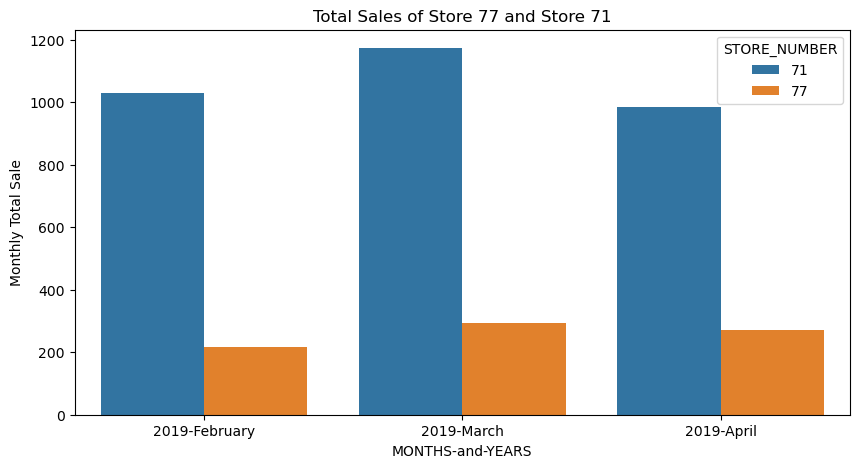

In [60]:
plt.figure(figsize=(10,5))
plt.title('Total Sales of Store 77 and Store 71')
total_sale= sns.barplot(x=concate_for_store_77_71['MONTHS-and-YEARS'], y= concate_for_store_77_71['Monthly Total Sale'], hue=concate_for_store_77_71['STORE_NUMBER'])

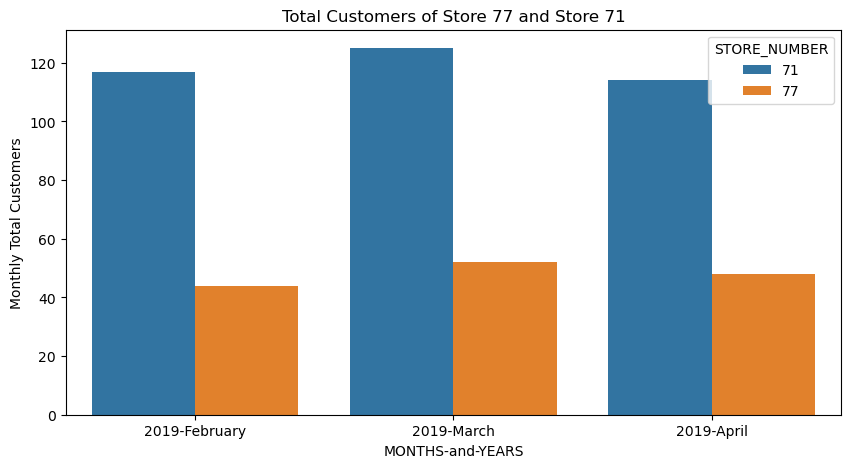

In [61]:
plt.figure(figsize=(10,5))
plt.title('Total Customers of Store 77 and Store 71')
total_customer_77= sns.barplot(x=concate_for_store_77_71['MONTHS-and-YEARS'], y= concate_for_store_77_71['Monthly Total Customers'], hue=concate_for_store_77_71['STORE_NUMBER'])

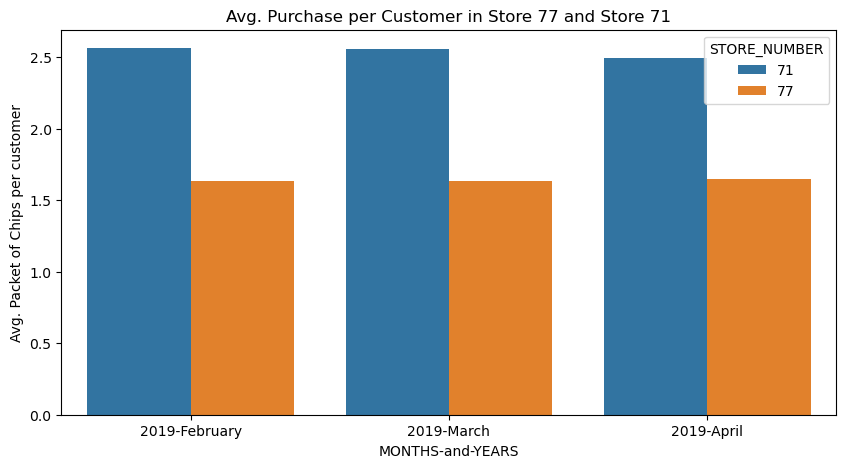

In [62]:
plt.figure(figsize=(10,5))
plt.title('Avg. Purchase per Customer in Store 77 and Store 71')
avg_purchase_77= sns.barplot(x=concate_for_store_77_71['MONTHS-and-YEARS'], y=concate_for_store_77_71['Avg. Packet of Chips per customer'], hue=concate_for_store_77_71['STORE_NUMBER'])

In the analysis between Trial Store 77 and Control Store 71, we can see that their is a major difference in the Total sales of both the stores meaning that the sales of Store 71 is more than Store 77. Moreover we can also see from the analysis that the Total Customers and Avg. Purchase Per Customer also has a difference as Store 71 has the highest Total Customers and Avg. Purchase Per Customer. 

## CONTROL STORE for TRIAL STORE 88

In [65]:
trial_store_88=[88]
dataframe_88= filter_col

first_TEST_88= to_find_control(dataframe_88, trial_store_88)
first_TEST_88

[{'TRIAL Store_num': 88,
  'CONTROL Store_num': 1,
  'Monthly Total Sale CRR_1': 0.8470010106974903,
  'Monthly Total Customers CRR_2': 0.9002194698145457,
  'Mean btw CRR_1&CRR_2': 0.873610240256018},
 {'TRIAL Store_num': 88,
  'CONTROL Store_num': 2,
  'Monthly Total Sale CRR_1': 0.923050226967333,
  'Monthly Total Customers CRR_2': 0.9110741031959564,
  'Mean btw CRR_1&CRR_2': 0.9170621650816446},
 {'TRIAL Store_num': 88,
  'CONTROL Store_num': 3,
  'Monthly Total Sale CRR_1': 0.9486599285891008,
  'Monthly Total Customers CRR_2': 0.978149883781812,
  'Mean btw CRR_1&CRR_2': 0.9634049061854564},
 {'TRIAL Store_num': 88,
  'CONTROL Store_num': 4,
  'Monthly Total Sale CRR_1': 0.9242816357294079,
  'Monthly Total Customers CRR_2': 0.9651548542751827,
  'Mean btw CRR_1&CRR_2': 0.9447182450022953},
 {'TRIAL Store_num': 88,
  'CONTROL Store_num': 5,
  'Monthly Total Sale CRR_1': 0.9004682402530072,
  'Monthly Total Customers CRR_2': 0.9350215807359029,
  'Mean btw CRR_1&CRR_2': 0.9177449

In [66]:
df_of_first_TEST_88= pd.DataFrame(first_TEST_88)
df_of_first_TEST_88.head(5)

,TRIAL Store_num,CONTROL Store_num,Monthly Total Sale CRR_1,Monthly Total Customers CRR_2,Mean btw CRR_1&CRR_2
0,88,1,0.847001,0.900219,0.873610
1,88,2,0.923050,0.911074,0.917062
2,88,3,0.948660,0.978150,0.963405
3,88,4,0.924282,0.965155,0.944718
4,88,5,0.900468,0.935022,0.917745


In [67]:
Control_store_of_88= df_of_first_TEST_88.nlargest(5, ['Mean btw CRR_1&CRR_2']) 
Control_store_of_88

,TRIAL Store_num,CONTROL Store_num,Monthly Total Sale CRR_1,Monthly Total Customers CRR_2,Mean btw CRR_1&CRR_2
77,88,88,1.000000,1.000000,1.000000
179,88,201,0.986401,0.981499,0.983950
177,88,199,0.973530,0.988061,0.980795
49,88,57,0.978357,0.979748,0.979052
232,88,259,0.976978,0.979463,0.978220


### Compairing Trial Store 88 and Control Store 201 on the months of Feb to April 2019

In [68]:
Feb_2019_store_88 = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-February')& (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([88,201]))]
Feb_2019_store_88

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1933,2019-February,88,1356.4,122,1.245902,2.491803,4.461842
2045,2019-February,201,1166.6,114,1.149123,2.289474,4.469466


In [69]:
March_2019_store_88 = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-March')& (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([88,201]))]
March_2019_store_88

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
2971,2019-March,88,1459.2,135,1.244444,2.488889,4.342857
3083,2019-March,201,1257.4,120,1.166667,2.308333,4.545714


In [70]:
April_2019_store_88 = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-April')& (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([88,201]))]
April_2019_store_88

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1668,2019-April,88,1439.6,123,1.325203,2.650407,4.415951
1779,2019-April,201,1242.2,120,1.208333,2.400000,4.315862


In [71]:
concate_for_store_88_201= pd.concat([Feb_2019_store_88,March_2019_store_88,April_2019_store_88], axis=0)
concate_for_store_88_201

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1933,2019-February,88,1356.4,122,1.245902,2.491803,4.461842
2045,2019-February,201,1166.6,114,1.149123,2.289474,4.469466
2971,2019-March,88,1459.2,135,1.244444,2.488889,4.342857
3083,2019-March,201,1257.4,120,1.166667,2.308333,4.545714
1668,2019-April,88,1439.6,123,1.325203,2.650407,4.415951
1779,2019-April,201,1242.2,120,1.208333,2.400000,4.315862


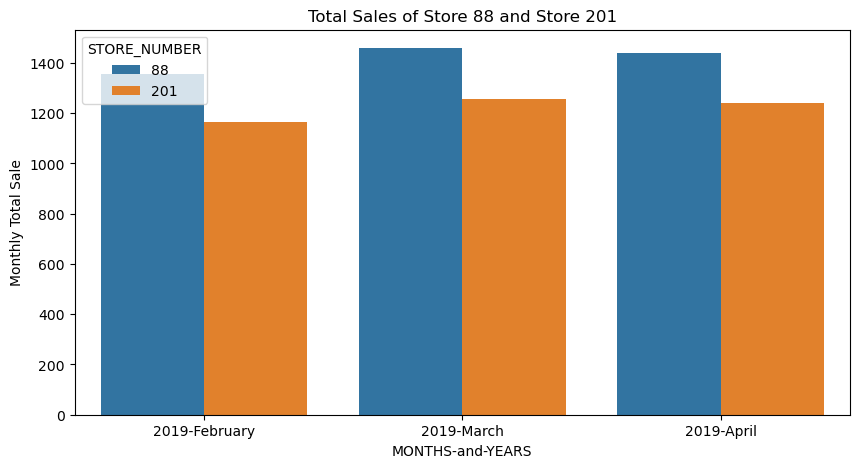

In [72]:
plt.figure(figsize=(10,5))
plt.title('Total Sales of Store 88 and Store 201')
store_88_sales= sns.barplot(x= concate_for_store_88_201['MONTHS-and-YEARS'], y= concate_for_store_88_201['Monthly Total Sale'], hue=concate_for_store_88_201['STORE_NUMBER'])

In the above graph, we can see that there is a difference in the Total Sales of Trial Store-88 and Control Store-201 for the period of February,2019-April,2019. The Trial Store's sale increased during this period and the Control Store's decreased during this period.

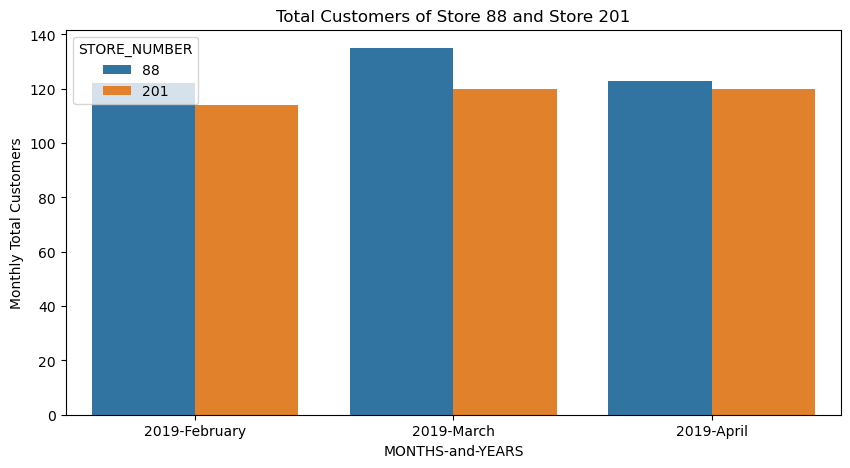

In [73]:
plt.figure(figsize=(10,5))
plt.title('Total Customers of Store 88 and Store 201')
store_88_customer= sns.barplot(x= concate_for_store_88_201['MONTHS-and-YEARS'], y= concate_for_store_88_201['Monthly Total Customers'], hue=concate_for_store_88_201['STORE_NUMBER'])

For the Total Customers in the Trial Store-88 and Control Store-201, we can see that the Trial Store's Customers increased during the months of February,2019 - April,2019. Furthermore, from the analysis we can also say that on the Months of April,2019 the total number of customers in both the stores were almost same.

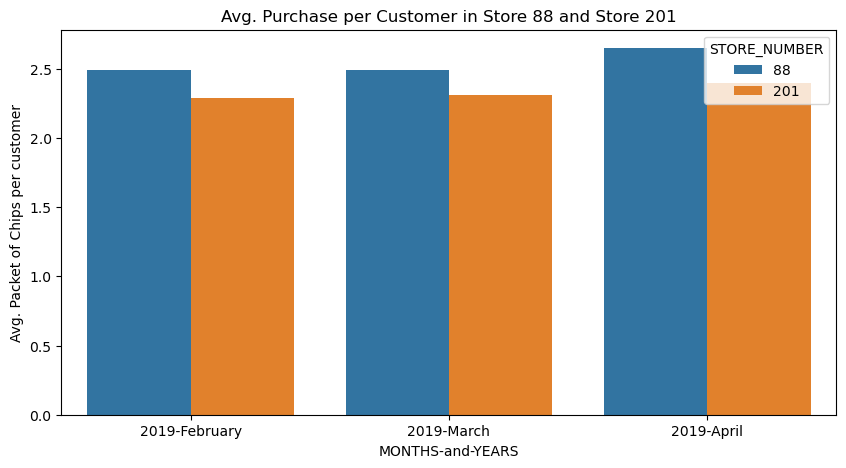

In [74]:
plt.figure(figsize=(10,5))
plt.title('Avg. Purchase per Customer in Store 88 and Store 201')
store_88_avg_unit= sns.barplot(x= concate_for_store_88_201['MONTHS-and-YEARS'], y= concate_for_store_88_201['Avg. Packet of Chips per customer'], hue=concate_for_store_88_201['STORE_NUMBER'])

In the section of Avg. Purchase per Customer, the Customers bought more chips from Trail Store-88 comperitively to Control Store-201 during the period of February,2019-April,2019.

## CONTROL STORE for TRIAL STORE 86

In [75]:
trial_store_86=[86]
dataframe_86= filter_col

first_TEST_86= to_find_control(dataframe_86, trial_store_86)
first_TEST_86

[{'TRIAL Store_num': 86,
  'CONTROL Store_num': 1,
  'Monthly Total Sale CRR_1': 0.8850108033178227,
  'Monthly Total Customers CRR_2': 0.9196069038155322,
  'Mean btw CRR_1&CRR_2': 0.9023088535666774},
 {'TRIAL Store_num': 86,
  'CONTROL Store_num': 2,
  'Monthly Total Sale CRR_1': 0.8815129069981774,
  'Monthly Total Customers CRR_2': 0.9384487347863939,
  'Mean btw CRR_1&CRR_2': 0.9099808208922857},
 {'TRIAL Store_num': 86,
  'CONTROL Store_num': 3,
  'Monthly Total Sale CRR_1': 0.9457974587748299,
  'Monthly Total Customers CRR_2': 0.9556970148537784,
  'Mean btw CRR_1&CRR_2': 0.9507472368143042},
 {'TRIAL Store_num': 86,
  'CONTROL Store_num': 4,
  'Monthly Total Sale CRR_1': 0.900555889633526,
  'Monthly Total Customers CRR_2': 0.9330621332783375,
  'Mean btw CRR_1&CRR_2': 0.9168090114559317},
 {'TRIAL Store_num': 86,
  'CONTROL Store_num': 5,
  'Monthly Total Sale CRR_1': 0.9076528841071656,
  'Monthly Total Customers CRR_2': 0.9317322482935444,
  'Mean btw CRR_1&CRR_2': 0.91969

In [76]:
df_of_first_TEST_86= pd.DataFrame(first_TEST_86)
df_of_first_TEST_86.head(5)

,TRIAL Store_num,CONTROL Store_num,Monthly Total Sale CRR_1,Monthly Total Customers CRR_2,Mean btw CRR_1&CRR_2
0,86,1,0.885011,0.919607,0.902309
1,86,2,0.881513,0.938449,0.909981
2,86,3,0.945797,0.955697,0.950747
3,86,4,0.900556,0.933062,0.916809
4,86,5,0.907653,0.931732,0.919693


In [77]:
Control_store_of_86= df_of_first_TEST_86.nlargest(5, ['Mean btw CRR_1&CRR_2']) 
Control_store_of_86

,TRIAL Store_num,CONTROL Store_num,Monthly Total Sale CRR_1,Monthly Total Customers CRR_2,Mean btw CRR_1&CRR_2
75,86,86,1.000000,1.000000,1.000000
188,86,212,0.987779,0.980408,0.984093
201,86,226,0.983501,0.978750,0.981126
179,86,201,0.983519,0.978326,0.980922
164,86,184,0.979632,0.980957,0.980294


### Compairing Trial Store 86 and Control Store 212 on the months of Feb to April 2019¶

In [78]:
Feb_2019_store_86 = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-February')& (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([86,212]))]
Feb_2019_store_86

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1931,2019-February,86,853.4,103,1.271845,2.533981,3.271756
2054,2019-February,212,540.8,70,1.142857,2.285714,3.380000


In [79]:
March_2019_store_86 = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-March')& (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([86,212]))]
March_2019_store_86

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
2969,2019-March,86,980.8,112,1.232143,2.464286,3.553623
3092,2019-March,212,874.8,96,1.250000,2.500000,3.645000


In [80]:
April_2019_store_86 = COMPARING_DATAFRAMES_2[(COMPARING_DATAFRAMES_2['MONTHS-and-YEARS']== '2019-April')& (COMPARING_DATAFRAMES_2['STORE_NUMBER'].isin([86,212]))]
April_2019_store_86

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1666,2019-April,86,923.8,110,1.227273,2.454545,3.421481
1790,2019-April,212,808.2,100,1.220000,2.440000,3.312295


In [81]:
concate_for_store_86_212= pd.concat([Feb_2019_store_86,March_2019_store_86,April_2019_store_86], axis=0)
concate_for_store_86_212

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
1931,2019-February,86,853.4,103,1.271845,2.533981,3.271756
2054,2019-February,212,540.8,70,1.142857,2.285714,3.380000
2969,2019-March,86,980.8,112,1.232143,2.464286,3.553623
3092,2019-March,212,874.8,96,1.250000,2.500000,3.645000
1666,2019-April,86,923.8,110,1.227273,2.454545,3.421481
1790,2019-April,212,808.2,100,1.220000,2.440000,3.312295


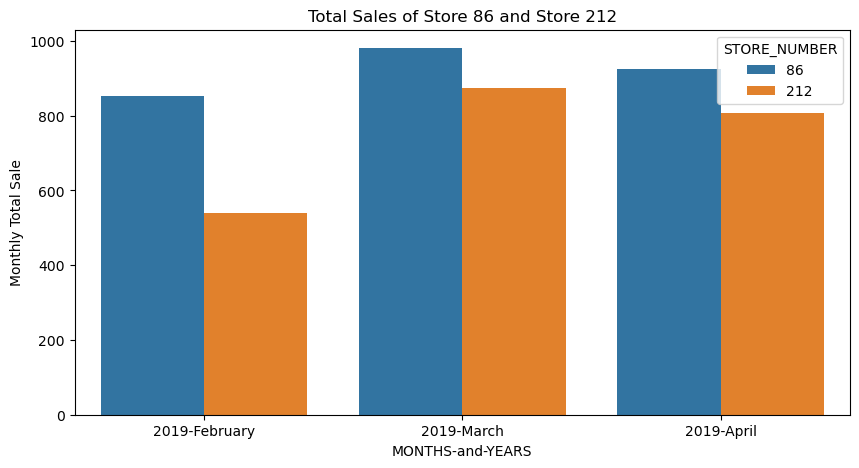

In [82]:
plt.figure(figsize=(10,5))
plt.title('Total Sales of Store 86 and Store 212')
store_86_sales= sns.barplot(x= concate_for_store_86_212['MONTHS-and-YEARS'], y= concate_for_store_86_212['Monthly Total Sale'], hue=concate_for_store_86_212['STORE_NUMBER'])

In the Total Sales of Trail Store 86 and Control Store 212, we can see that the The Total Sales of the Trail Store is more than the Control Store during the period of February,2019-April,2019

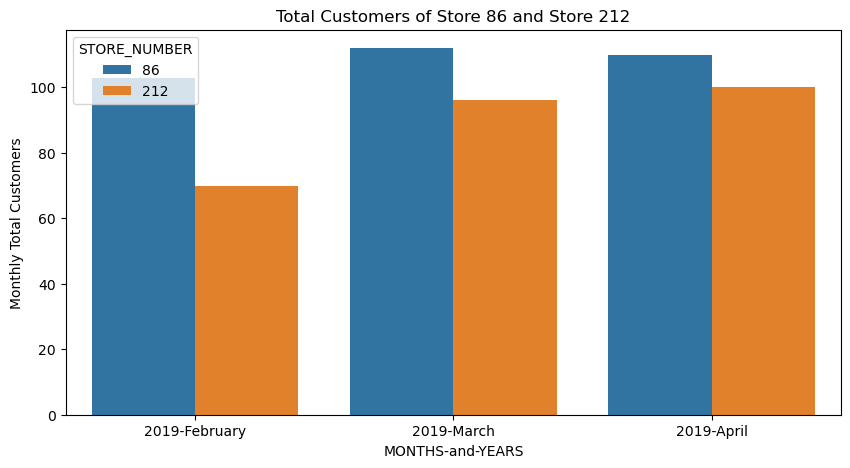

In [83]:
plt.figure(figsize=(10,5))
plt.title('Total Customers of Store 86 and Store 212')
store_86_customer= sns.barplot(x= concate_for_store_86_212['MONTHS-and-YEARS'], y= concate_for_store_86_212['Monthly Total Customers'], hue=concate_for_store_86_212['STORE_NUMBER'])

In the Total Customers of Trial Store 86 and Control Store 212, we can see that the Trial Store has more customers compaired to the Control Store from February,2019- April,2019.

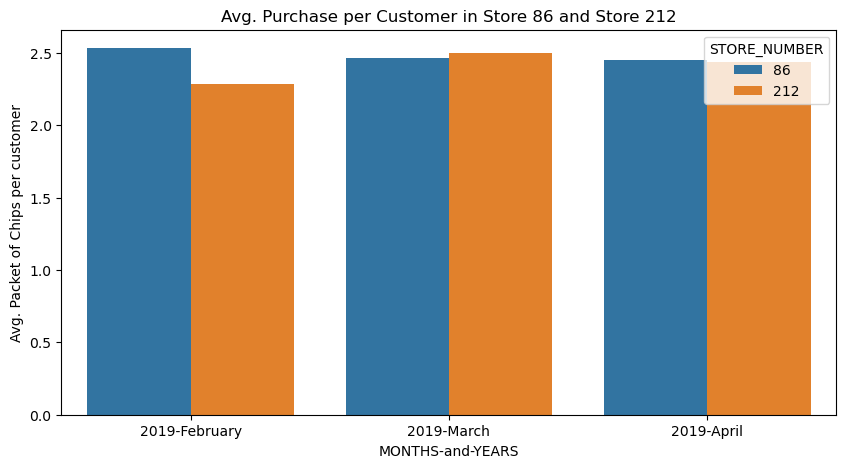

In [84]:
plt.figure(figsize=(10,5))
plt.title('Avg. Purchase per Customer in Store 86 and Store 212')
store_86_Avg_unit= sns.barplot(x= concate_for_store_86_212['MONTHS-and-YEARS'], y= concate_for_store_86_212['Avg. Packet of Chips per customer'], hue=concate_for_store_86_212['STORE_NUMBER'])

In the Avg. Purhcase Per Customer of Trial Store 86 and Control Store 212, we can see that in the month of March,2019 and April,2019 there is not much difference in the purchse behaviour of the Customers. Even though the Avg. Purchase per customer was more in the Control Store during the month of March,2019

# Rules of T-Test:
1> When the P-value is greater than the Significance Value, we accept the Null Hypothesis.

2> When the P-value is lesser than the Significance Value, we reject the Null Hypothesis.

3> In the code {stats.ttest_ind()} "equal_var" means EQUAL_VARIENCE. We kept it FALSE since the sample lenght of the 2 sample dataset are not equal, so oviouly the varience will not be equal. We should put it to TRUE if the variance were equal (after checking).

4> In ( stats.ttest_ind() ) the ind stands for INDEPENDENT

# T Test for Store No. 77 and 71

In [101]:
store_77_a= df_merg_4['STORE_NUMBER']==77
df_store_77 = df_merg_4[store_77_a]
df_store_77.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
72,2018-August,77,253.4,46,1.021739,1.586957,3.468085
337,2018-December,77,263.2,45,1.066667,1.555556,3.727083


In [102]:
store_71_a= df_merg_4['STORE_NUMBER']==71
df_store_71 = df_merg_4[store_71_a]
df_store_71.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
67,2018-August,71,960.3,103,1.38835,2.631068,3.483916
332,2018-December,71,965.8,110,1.30000,2.600000,3.376923


1> 
Null Hypothesis= Trial Store-77 performed better than Control Store-71

Alternate Hypothesis= Trial Store-77 performed didn't better than Control Store-71

2>
Confidence interval= 0.95%

#### Test for TOTAL SALES

In [105]:
T_test_77_a= stats.ttest_ind(df_store_77['Monthly Total Sale'],df_store_71['Monthly Total Sale'], equal_var= False)
T_test_77_a

TtestResult(statistic=-8.59827549726928, pvalue=7.184846868885755e-07, df=13.616404056614853)

Since, the P-Value is greater than 0.05% in the TOTAL SALES we accept the Null Hypothesis, which is, THE TRIAL STORE-77 PERFORMED BETTER THAN THE CONTROL STORE-71

#### Test for TOTAL CUSTOMERS

In [107]:
T_test_77_b= stats.ttest_ind(df_store_77['Monthly Total Customers'],df_store_71['Monthly Total Customers'], equal_var= False)
T_test_77_b

TtestResult(statistic=-6.651408613541968, pvalue=4.970641406516023e-06, df=16.359946790476883)

Since, the P-Value is greater than 0.05% in the TOTAL SALES we accept the Null Hypothesis, which is, THE TRIAL STORE-77 PERFORMED BETTER THAN THE CONTROL STORE-71

#### Test for  Avg. Monthly Transaction Per Customer

In [108]:
T_test_77_c= stats.ttest_ind(df_store_77['Avg. Monthly Transaction Per Customer'],df_store_71['Avg. Monthly Transaction Per Customer'], equal_var= False)
T_test_77_c

TtestResult(statistic=-8.53424239851514, pvalue=3.354210613243448e-07, df=15.279954107000428)

Since, the P-Value is greater than 0.05% in the TOTAL SALES we accept the Null Hypothesis, which is, THE TRIAL STORE-77 PERFORMED BETTER THAN THE CONTROL STORE-71


#### Test for Avg. Packet of Chips per customer

In [111]:
T_test_77_d= stats.ttest_ind(df_store_77['Avg. Packet of Chips per customer'],df_store_71['Avg. Packet of Chips per customer'], equal_var= False)
T_test_77_d

TtestResult(statistic=-15.165023929852271, pvalue=4.35826050503637e-12, df=19.048113416183707)

Since, the P-Value is greater than 0.05% in the TOTAL SALES we accept the Null Hypothesis, which is, THE TRIAL STORE-77 PERFORMED BETTER THAN THE CONTROL STORE-71

#### Test for Avg. Cost per chips

In [112]:
T_test_77_e= stats.ttest_ind(df_store_77['Avg. Cost per chips'],df_store_71['Avg. Cost per chips'], equal_var= False)
T_test_77_e

TtestResult(statistic=0.428472984038398, pvalue=0.673670531110618, df=17.050985658387585)

Since, the P-Value is greater than 0.05% in the TOTAL SALES we accept the Null Hypothesis, which is, THE TRIAL STORE-77 PERFORMED BETTER THAN THE CONTROL STORE-71

#### After performing T-test in between TRIAL STORE 77 and CONTROL STORE 71 we can say that, the TRIAL STORE 77 was successful.

# T Test for Store No. 88 and 201

In [113]:
store_88_a= df_merg_4['STORE_NUMBER']==88
df_store_88 = df_merg_4[store_88_a]
df_store_88.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
82,2018-August,88,1353.4,134,1.223881,2.320896,4.327134
347,2018-December,88,1305.2,124,1.185484,2.370968,4.439456


In [114]:
store_201_a= df_merg_4['STORE_NUMBER']==201
df_store_201 = df_merg_4[store_201_a]
df_store_201.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
193,2018-August,201,1175.7,119,1.184874,2.277311,4.338298
458,2018-December,201,1273.9,124,1.161290,2.306452,4.449306


1> NULL HYPOTHESIS= Trial Store-88 performed better than Control Store-201

Alternate Hypothesis= Trial Store-88 didn't performed better than Control Store-201

2> Confidence Interval is =0.95%

#### Test for TOTAL SALES 

In [120]:
T_test_88_a= stats.ttest_ind(df_store_88['Monthly Total Sale'],df_store_201['Monthly Total Sale'], equal_var= False)
T_test_88_a

TtestResult(statistic=1.1909152932654965, pvalue=0.2455456785684016, df=23.563677057045588)

Since the P-Value is greater than 0.05% in the Total Customer we accept the Null Hypothesis which is the TRIAL STORE-88 PERFORMED BETTER THAN THE CONTROL STORE-201E

#### Test for TOTAL CUSTOMERS 

In [121]:
T_test_88_b= stats.ttest_ind(df_store_88['Monthly Total Customers'],df_store_201['Monthly Total Customers'], equal_var= False)
T_test_88_b

TtestResult(statistic=0.6310733570503833, pvalue=0.5339815653779565, df=23.901021599131944)

Since the P-Value is greater than 0.05% in the Total Customer we accept the Null Hypothesis which is the TRIAL STORE-88 PERFORMED BETTER THAN THE CONTROL STORE-201

#### Test for Avg. Monthly Transaction Per Customer `

In [122]:
T_test_88_c= stats.ttest_ind(df_store_88['Avg. Monthly Transaction Per Customer'],df_store_201['Avg. Monthly Transaction Per Customer'], equal_var= False)
T_test_88_c

TtestResult(statistic=2.1486572132848654, pvalue=0.042263708304242996, df=23.33441974647026)

Since the P-Value is lesser than 0.05% in the Avg. Monthly Transaction Per Customer, we reject the Null Hypothesis which is the TRIAL STORE-88 DIDN"T PERFORMED BETTER THAN THE CONTROL STORE-201

#### Test for Avg. Packet of Chips per customer 

In [123]:
T_test_88_d= stats.ttest_ind(df_store_88['Avg. Packet of Chips per customer'],df_store_201['Avg. Packet of Chips per customer'], equal_var= False)
T_test_88_d

TtestResult(statistic=2.4001865299026024, pvalue=0.025058967769192097, df=22.54057703712407)

Since the P-Value is lesser than 0.05% in the Avg. Monthly Transaction Per Customer, we reject the Null Hypothesis which is the TRIAL STORE-88 DIDN"T PERFORMED BETTER THAN THE CONTROL STORE-201

#### Test for Avg. Cost per chips 

In [124]:
T_test_88_e= stats.ttest_ind(df_store_88['Avg. Cost per chips'],df_store_201['Avg. Cost per chips'], equal_var= False)
T_test_88_e

TtestResult(statistic=-0.04548201806298375, pvalue=0.9641040640232755, df=23.706856476614742)

Since the P-Value is greater than 0.05% in the Avg. Monthly Transaction Per Customer, we accept the Null Hypothesis which is the TRIAL STORE-88 PERFORMED BETTER THAN THE CONTROL STORE-201

#### After performing T-test in between TRIAL STORE 88 and CONTROL STORE 201 we can see that the TRIAL STORE performed good with the total sales and the total customer, but, didn't performed well with the Average Monthly Transaction Per Customer and the Average Packet of Chips per customer.

### T Test for Store No. 86 and 212

In [125]:
store_86_a= df_merg_4['STORE_NUMBER']== 86
df_store_86 = df_merg_4[store_86_a]
df_store_86.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
80,2018-August,86,783.85,98,1.163265,2.234694,3.608333
345,2018-December,86,919.80,105,1.247619,2.495238,3.510687


In [127]:
store_212_a= df_merg_4['STORE_NUMBER']== 212
df_store_212 = df_merg_4[store_212_a]
df_store_212.head(2)

,MONTHS-and-YEARS,STORE_NUMBER,Monthly Total Sale,Monthly Total Customers,Avg. Monthly Transaction Per Customer,Avg. Packet of Chips per customer,Avg. Cost per chips
202,2018-August,212,662.8,80,1.175000,2.387500,3.521277
467,2018-December,212,809.0,95,1.221053,2.442105,3.487069


1> NULL HYPOTHESIS= Trial Store-86 performed better than Control Store-212

Alternate HYPOTHESIS= Trial Store-86 performed didn't better than Control Store-212

2> Confidence interval= 0.95%

#### Test for TOTAL SALES

In [129]:
T_test_86_a= stats.ttest_ind(df_store_86['Monthly Total Sale'], df_store_212['Monthly Total Sale'], equal_var=False)
T_test_86_a

TtestResult(statistic=1.5396487428395096, pvalue=0.13712915625415706, df=23.280289291851204)

Since, the P-Value is greater than 0.05% in the TOTAL SALES we accept the Null Hypothesis, which is, THE TRIAL STORE- 86 PERFORMED BETTER
THAN THE CONTROL STOR-212E

#### Test for TOTAL CUSTOMERS 

In [130]:
T_test_86_b= stats.ttest_ind(df_store_86['Monthly Total Customers'], df_store_212['Monthly Total Customers'], equal_var=False)
T_test_86_b

TtestResult(statistic=1.5179514418988556, pvalue=0.14268264835803987, df=22.95008484676441)

Since the P-Value is greater than 0.05% in the TOTAL CUSTOMERS we accept the NULL HYPOTHESIS, which is, THE TRIAL STORE-86 PERFORMED BETTER THAN THE CONTROL STORE-212

#### Test for Avg. Monthly Transaction Per Customer 

In [131]:
T_test_86_c= stats.ttest_ind(df_store_86['Avg. Monthly Transaction Per Customer'], df_store_212['Avg. Monthly Transaction Per Customer'], equal_var=False)
T_test_86_c

TtestResult(statistic=0.36886748008902887, pvalue=0.7154609770550768, df=23.99759881829059)

Since the P-Value is greater than 0.05% in the TOTAL CUSTOMERS we accept the NULL HYPOTHESIS, which is, THE TRIAL STORE-86 PERFORMED BETTER THAN THE CONTROL STORE-212

### Test for Avg. Packet of Chips per customer

In [132]:
T_test_86_d= stats.ttest_ind(df_store_86['Avg. Packet of Chips per customer'], df_store_212['Avg. Packet of Chips per customer'], equal_var=False)
T_test_86_d

TtestResult(statistic=0.3829862148341725, pvalue=0.7051123618497646, df=23.920153707967543)

Since the P-Value is greater than 0.05% in the Avg. Packet of Chips per customer we accept the NULL HYPOTHESIS, which is, THE TRIAL STORE-86 PERFORMED BETTER THAN THE CONTROL STORE-212

#### Test for Avg. Cost per chips 

In [133]:
T_test_86_e= stats.ttest_ind(df_store_86['Avg. Cost per chips'], df_store_212['Avg. Cost per chips'], equal_var=False)
T_test_86_e

TtestResult(statistic=0.04644740390123478, pvalue=0.9633514282198865, df=23.184435335726082)

Since the P-Value is greater than 0.05% in the Avg. Packet of Chips per customer we accept the NULL HYPOTHESIS, which is, THE TRIAL STORE-86 PERFORMED BETTER THAN THE CONTROL STORE-212

#### After performing the T-test between the Trial Store 86 and CONTROL Store 212 we can say that the TRAIL STORE- 86 was successful 

# CONCLUSION:-
As we can see after performing the T-Test between all the TRAIL STORE and the CONTROL STORE, we can conclude that the the TRAIL STORE- 77 and 86 were successful, but, in the case of TRAIL STORE-88, we can see that it performed good with the total sales and the total customer, but, didn't performed well with the Average Monthly Transaction Per Customer and the Average Packet of Chips per customer.